In [75]:
import warnings

import pandas as pd
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1)
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [76]:
df_train = pd.read_csv('~/Downloads/Preprocessed_Data_V2/train.csv', index_col='date', infer_datetime_format=True).drop(
    columns=['Unnamed: 0'])
df_test = pd.read_csv('~/Downloads/Preprocessed_Data_V2/test.csv', index_col='date', infer_datetime_format=True).drop(
    columns=['Unnamed: 0'])
# train and test data size
print(df_train.shape, df_test.shape)

(445794, 87) (112032, 87)


In [80]:
df = df_train
df.index = pd.to_datetime(df.index)
df.rename(columns={'num__deaths_per_100000': 'death', 'covid_19_confirmed_cases': 'confirmed'}, inplace=True)
df['day'] = df.index.day
df['month'] = df.index.month
df[['death', 'confirmed']].describe()

,death,confirmed
count,445794.000000,445794.000000
mean,0.417545,9.246271
std,0.131093,68.737610
min,0.000000,-1834.000000
25%,0.331003,0.000000
50%,0.421829,0.000000
75%,0.505520,2.000000
max,1.000000,9589.000000


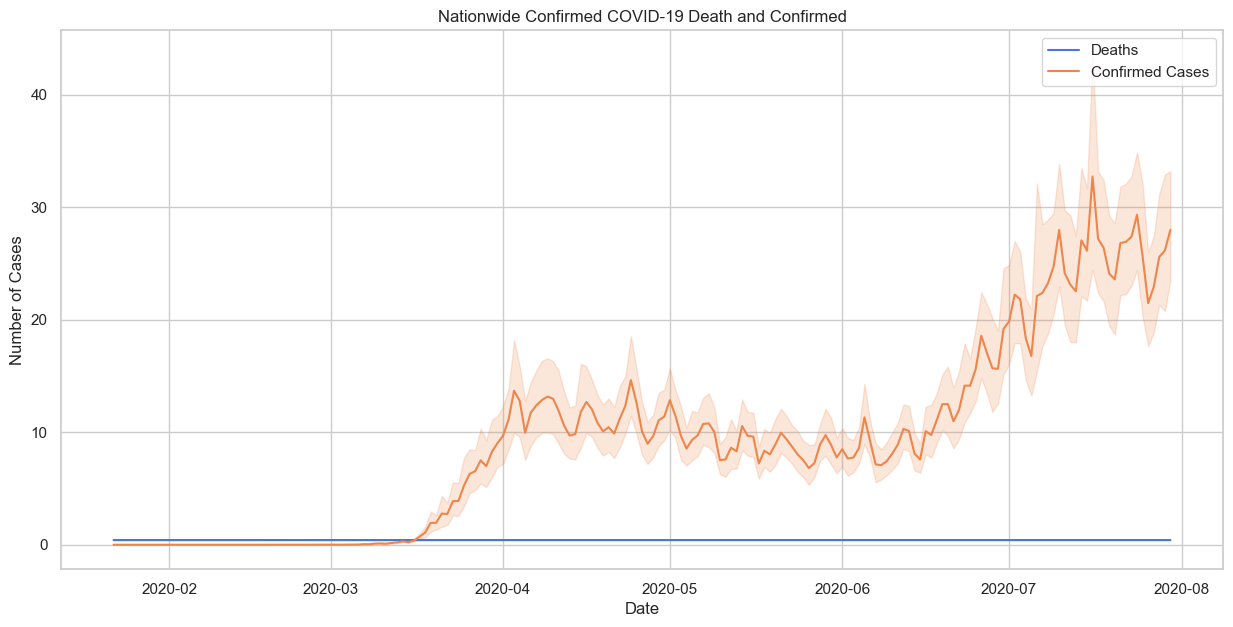

In [82]:
# plot the death and confirmed cases
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(x=df.index, y='death', data=df, ax=ax, label='Deaths')
sns.lineplot(x=df.index, y='confirmed', data=df, ax=ax, label='Confirmed Cases')
ax.set_title('Nationwide Confirmed COVID-19 Death and Confirmed')
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Date')
plt.show()

In [90]:
regions = {
    'West': ['Washington', 'Oregon', 'Idaho', 'Montana', 'Wyoming', 'Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'Southwest': ['California', 'Nevada', 'Utah', 'Colorado'],
    'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
                'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky',
              'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'South Carolina',
              'Tennessee', 'Virginia', 'West Virginia'],
    'NewEngland': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York',
                   'New Jersey', 'Pennsylvania'],
    'Utopia': ['Alaska', 'Hawaii']
}

In [85]:
# compare and contrast death and confirmed cases nation-wide
death = df.groupby(['state_name', 'date']).agg({'death': 'sum'}).reset_index()
confirmed = df.groupby(['state_name', 'date']).agg({'confirmed': 'sum'}).reset_index()

In [86]:
West = df[df['state_name'].isin(regions['West'])]
Southwest = df[df['state_name'].isin(regions['Southwest'])]
Midwest = df[df['state_name'].isin(regions['Midwest'])]
NewEngland = df[df['state_name'].isin(regions['NewEngland'])]
South = df[df['state_name'].isin(regions['South'])]
Utopia = df[df['state_name'].isin(regions['Utopia'])]

In [88]:
# print the number of observations for each region
print('West: ', West.shape[0])
print('Southwest: ', Southwest.shape[0])
print('Midwest: ', Midwest.shape[0])
print('NewEngland: ', NewEngland.shape[0])
print('South: ', South.shape[0])

West:  72962
Southwest:  23493
Midwest:  152036
NewEngland:  37627
South:  158912


In [116]:
West.to_csv('~/Downloads/Preprocessed_Data_V2/West.csv')
Southwest.to_csv('~/Downloads/Preprocessed_Data_V2/Southwest.csv')
Midwest.to_csv('~/Downloads/Preprocessed_Data_V2/Midwest.csv')
NewEngland.to_csv('~/Downloads/Preprocessed_Data_V2/NewEngland.csv')
South.to_csv('~/Downloads/Preprocessed_Data_V2/South.csv')
Utopia.to_csv('~/Downloads/Preprocessed_Data_V2/Utopia.csv')

### Time Series Analysis

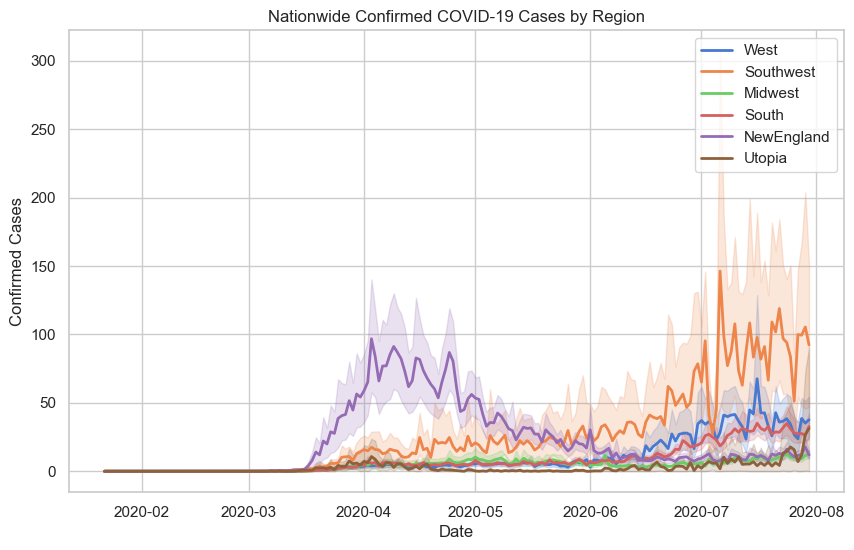

In [114]:
### Time Series Analysis
plt.figure(figsize=(10, 6))

for region, region_data in regions.items():
    df_region = df[df['state_name'].isin(regions[region])]
    # plot all regions confirmed cases in one graph
    sns.lineplot(data=df_region, x=df_region.index, y='confirmed', label=region, lw=2)
    plt.title('Nationwide Confirmed COVID-19 Cases by Region')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.legend()
    plt.grid(True)
plt.show()

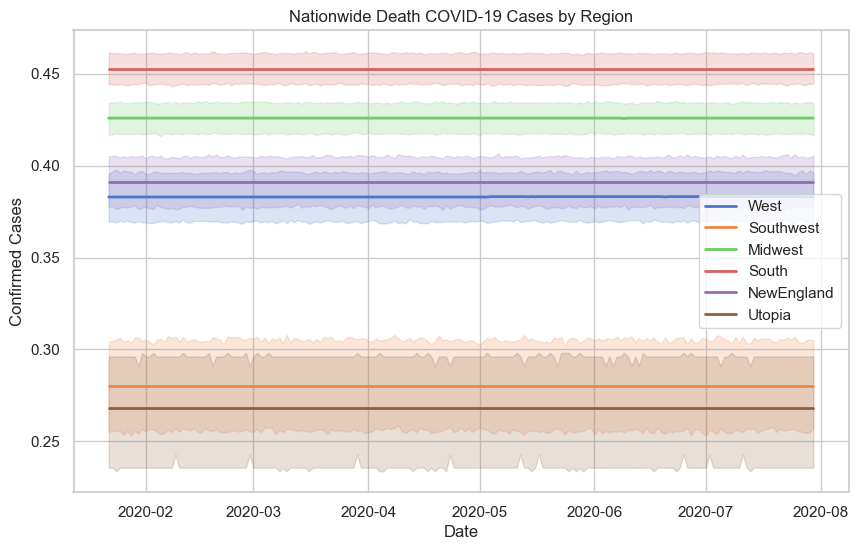

In [115]:
plt.figure(figsize=(10, 6))

for region, region_data in regions.items():
    df_region = df[df['state_name'].isin(regions[region])]
    # plot all regions confirmed cases in one graph
    sns.lineplot(data=df_region, x=df_region.index, y='death', label=region, lw=2)
    plt.title('Nationwide Death COVID-19 Cases by Region')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.legend()
    plt.grid(True)
plt.show()

In [117]:
#Test Data
df = df_test
df.index = pd.to_datetime(df.index)
df.rename(columns={'num__deaths_per_100000': 'death', 'covid_19_confirmed_cases': 'confirmed'}, inplace=True)
df['day'] = df.index.day
df['month'] = df.index.month
df[['death', 'confirmed']].describe()
# compare and contrast death and confirmed cases nation-wide
death = df.groupby(['state_name', 'date']).agg({'death': 'sum'}).reset_index()
confirmed = df.groupby(['state_name', 'date']).agg({'confirmed': 'sum'}).reset_index()
West = df[df['state_name'].isin(regions['West'])]
Southwest = df[df['state_name'].isin(regions['Southwest'])]
Midwest = df[df['state_name'].isin(regions['Midwest'])]
NewEngland = df[df['state_name'].isin(regions['NewEngland'])]
South = df[df['state_name'].isin(regions['South'])]
Utopia = df[df['state_name'].isin(regions['Utopia'])]
# print the number of observations for each region
print('West: ', West.shape[0])
print('Southwest: ', Southwest.shape[0])
print('Midwest: ', Midwest.shape[0])
print('NewEngland: ', NewEngland.shape[0])
print('South: ', South.shape[0])
West.to_csv('~/Downloads/Preprocessed_Data_V2/region_test/West.csv')
Southwest.to_csv('~/Downloads/Preprocessed_Data_V2/region_test/Southwest.csv')
Midwest.to_csv('~/Downloads/Preprocessed_Data_V2/region_test/Midwest.csv')
NewEngland.to_csv('~/Downloads/Preprocessed_Data_V2/region_test/NewEngland.csv')
South.to_csv('~/Downloads/Preprocessed_Data_V2/region_test/South.csv')
Utopia.to_csv('~/Downloads/Preprocessed_Data_V2/Utopia.csv')

West:  18336
Southwest:  5904
Midwest:  38208
NewEngland:  9456
South:  39936
